<a href="https://colab.research.google.com/github/Suryansh-Soni/ML-Models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle

In [ ]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [ ]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    

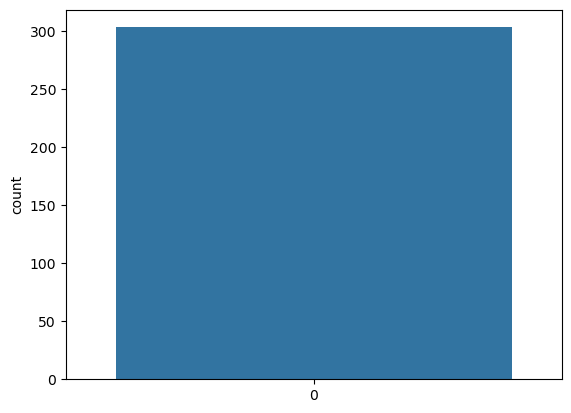

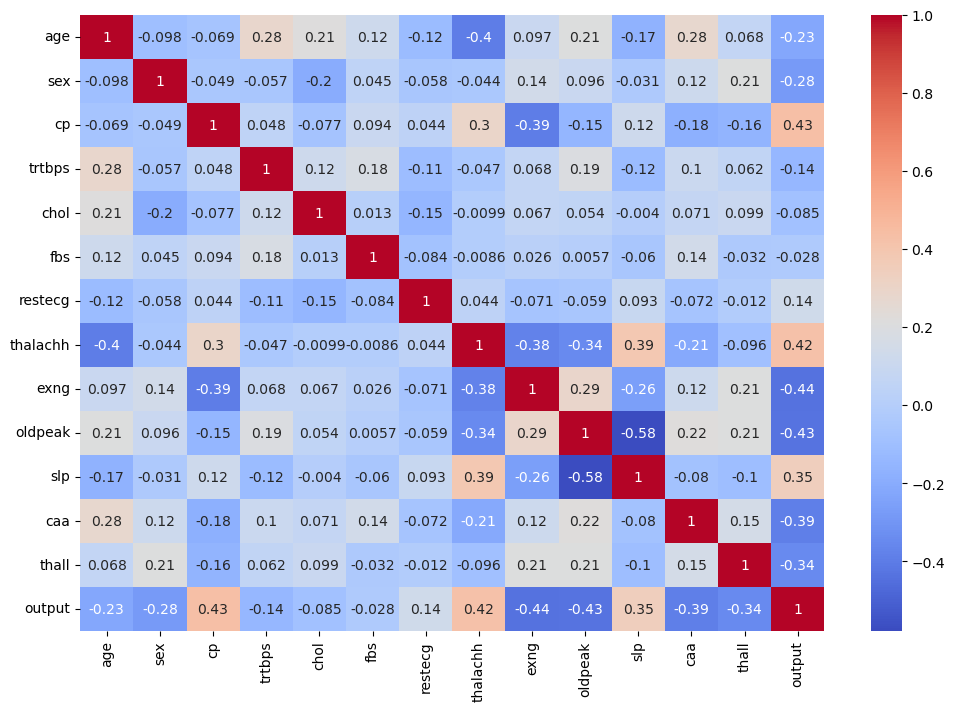

In [ ]:
# View the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the class distribution
sns.countplot(data['output'])
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

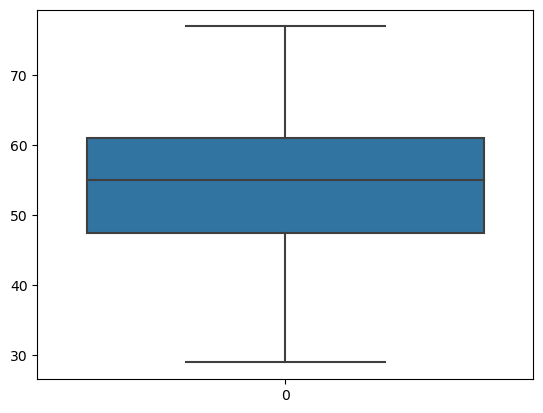

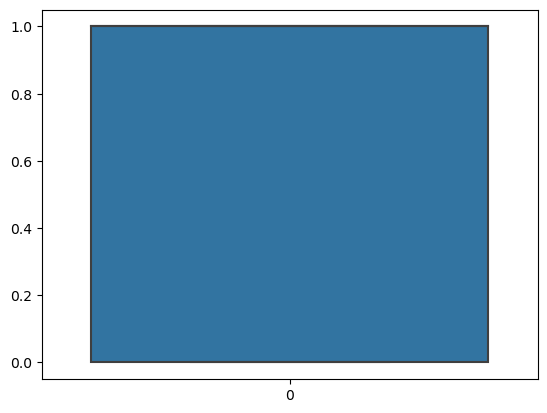

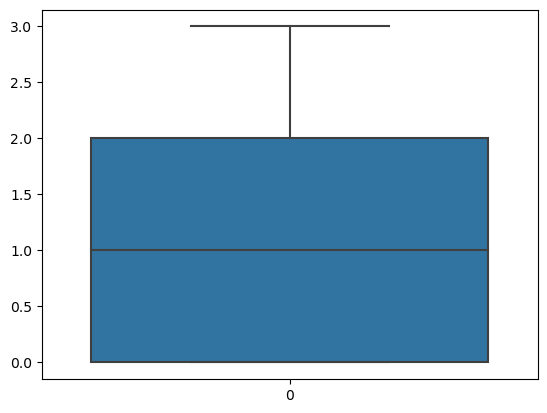

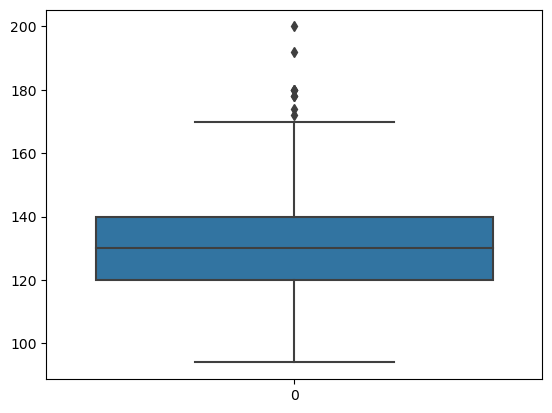

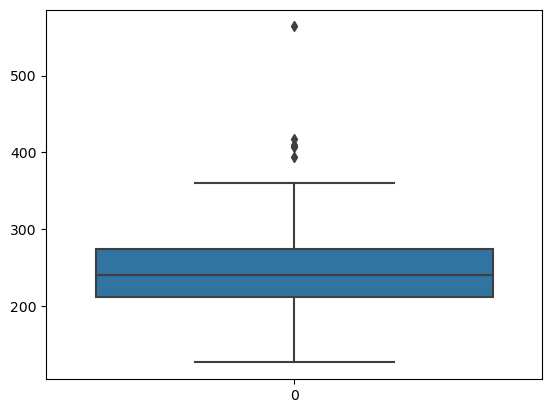

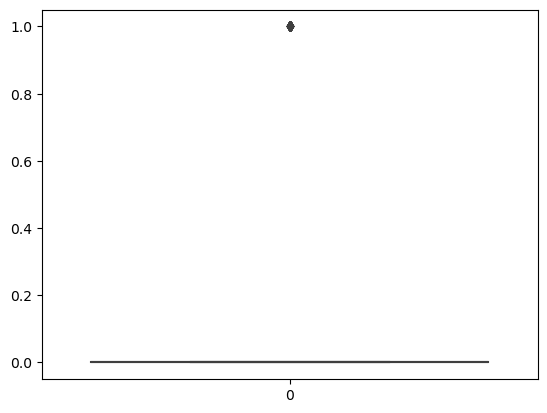

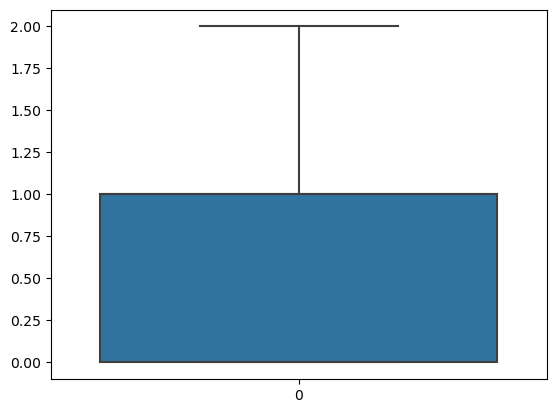

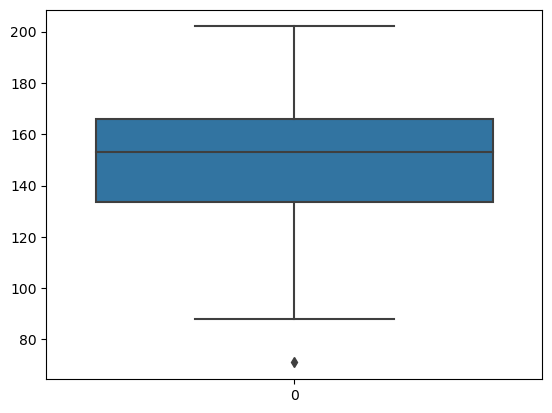

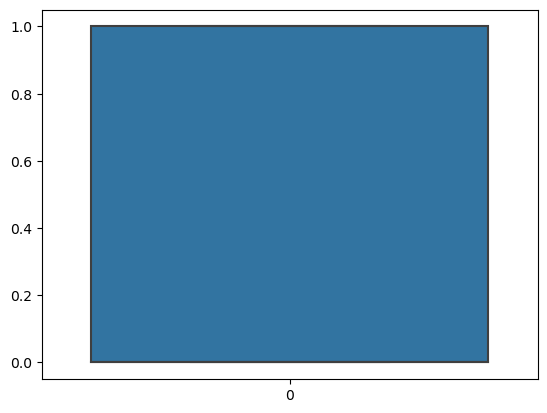

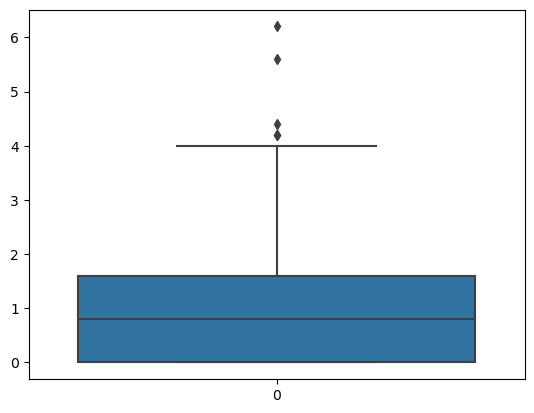

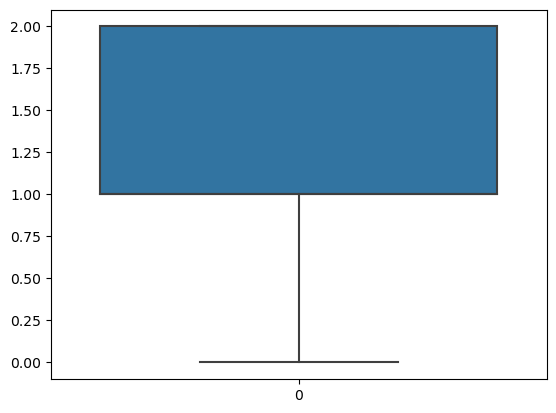

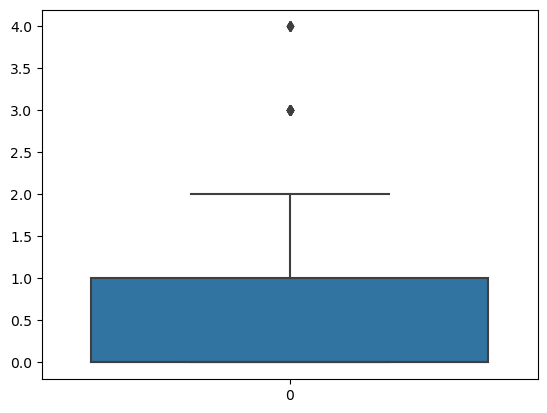

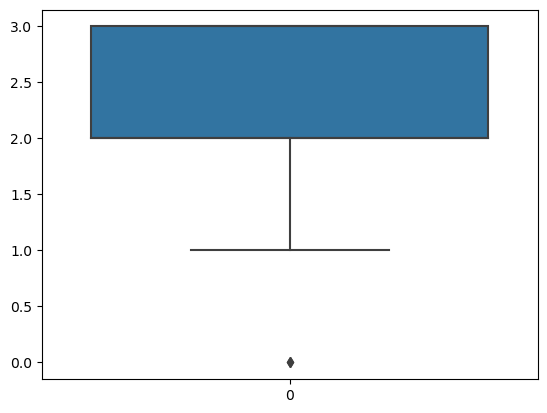

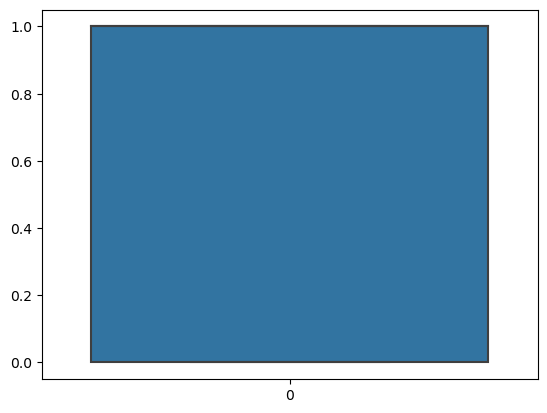

In [ ]:
# Boxplot for detecting outliers
for column in data.columns:
    sns.boxplot(data[column])
    plt.show()

# Removing outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Removing features with low correlation to the target
correlation_threshold = 0.05
correlation = data_cleaned.corr()['output'].abs()
selected_features = correlation[correlation > correlation_threshold].index.tolist()

# Creating new data with selected features
data_selected = data_cleaned[selected_features]


In [ ]:
data_selected

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


In [ ]:
# Handling missing values
data_cleaned.fillna(data_cleaned.median(), inplace=True)

C:\Users\Sohel J\AppData\Local\Temp\ipykernel_2756\470213915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.fillna(data_cleaned.median(), inplace=True)


In [ ]:
# Split the data into features and target
X = data_selected.drop('output', axis=1)
y = data_selected['output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# KNN model initialization
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Hyperparameter tuning for K value
param_grid = {'n_neighbors': np.arange(1, 30)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K value: {best_k}")

# Rebuilding the model with optimal K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

Optimal K value: 20


KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Saving the model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_best, file)

# Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
# Loading the model
with open('knn_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Loading the scaler
with open('scaler.pkl', 'rb') as file:
    saved_scaler = pickle.load(file)

# Transform the test data
X_test_scaled_saved = saved_scaler.transform(X_test)

# Prediction
y_pred = saved_model.predict(X_test_scaled_saved)


              precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.76      0.93      0.84        41

    accuracy                           0.78        69
   macro avg       0.80      0.75      0.76        69
weighted avg       0.79      0.78      0.77        69



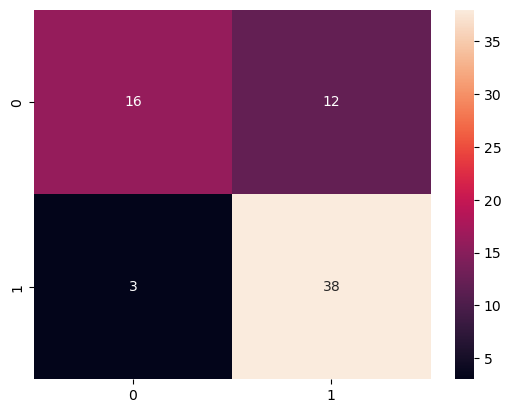

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


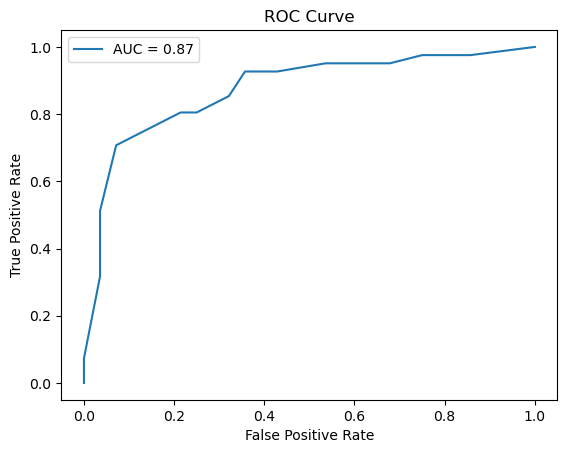

In [ ]:
# AUC-ROC curve
y_pred_proba = saved_model.predict_proba(X_test_scaled_saved)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
